In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import pickle

C:\Users\vaish\AppData\Local\Temp\ipykernel_24676\2008815147.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_data = pd.read_csv('Flight_dataset/Clean_Dataset.csv')
train_data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
train_data['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [5]:
train_data['duration'].value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

In [6]:
def duration_convert(float_hrs):
      hrs = int(float_hrs)
      if hrs > 23:
          days = hrs // 24
          hrs = hrs % 24
      else:
          days = 0

      mins = int((float_hrs - int(float_hrs))* 60)
      time_obj = dt.time(hrs, mins)
      time_str = time_obj.strftime('%H:%M')
      time_str = f"{days}:" + time_str
      return time_str
train_data['duration'] =train_data['duration'].apply(duration_convert)
train_data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0:02:10,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0:02:19,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0:02:10,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0:02:15,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0:02:19,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,0:10:04,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,0:10:25,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,0:13:49,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,0:10:00,49,81585


In [7]:
def new_duration_cols(time_str):
    days, hrs, mins = map(int, time_str.split(':'))
    return days, hrs, mins
train_data['duration_days'], train_data['duration_hours'], train_data['duration_mins']= zip(*train_data['duration'].apply(new_duration_cols))
train_data.drop('duration',axis=1,inplace=True)
train_data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_days,duration_hours,duration_mins
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953,0,2,10
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953,0,2,19
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956,0,2,10
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955,0,2,15
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955,0,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,49,69265,0,10,4
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,49,77105,0,10,25
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,49,79099,0,13,49
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,49,81585,0,10,0


In [8]:
train_data.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)
train_data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_days,duration_hours,duration_mins
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953,0,2,10
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953,0,2,19
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956,0,2,10
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955,0,2,15
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955,0,2,19


<Axes: title={'center': 'Days Left for Flight'}, xlabel='days_left'>

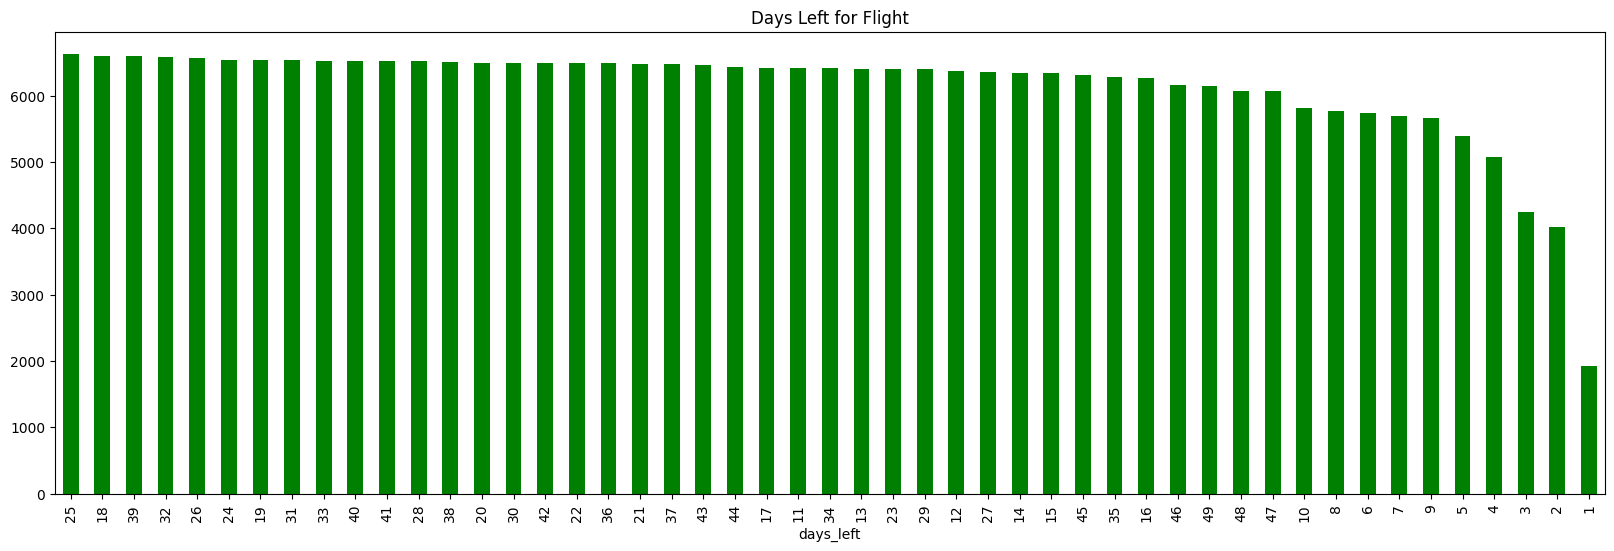

In [9]:
plt.figure(figsize = (20,6))
train_data['days_left'].value_counts().plot(
    kind='bar',title='Days Left for Flight', color='green')


In [10]:
train_data['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [11]:
new_mapping = {'zero':0, 'one':1, 'two_or_more':2}
train_data['no_of_stops']=train_data['stops'].map(new_mapping)
train_data.drop('stops',axis=1,inplace=True)
train_data

,airline,source_city,departure_time,arrival_time,destination_city,class,days_left,price,duration_days,duration_hours,duration_mins,no_of_stops
0,SpiceJet,Delhi,Evening,Night,Mumbai,Economy,1,5953,0,2,10,0
1,SpiceJet,Delhi,Early_Morning,Morning,Mumbai,Economy,1,5953,0,2,19,0
2,AirAsia,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,1,5956,0,2,10,0
3,Vistara,Delhi,Morning,Afternoon,Mumbai,Economy,1,5955,0,2,15,0
4,Vistara,Delhi,Morning,Morning,Mumbai,Economy,1,5955,0,2,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,Evening,Hyderabad,Business,49,69265,0,10,4,1
300149,Vistara,Chennai,Afternoon,Night,Hyderabad,Business,49,77105,0,10,25,1
300150,Vistara,Chennai,Early_Morning,Night,Hyderabad,Business,49,79099,0,13,49,1
300151,Vistara,Chennai,Early_Morning,Evening,Hyderabad,Business,49,81585,0,10,0,1


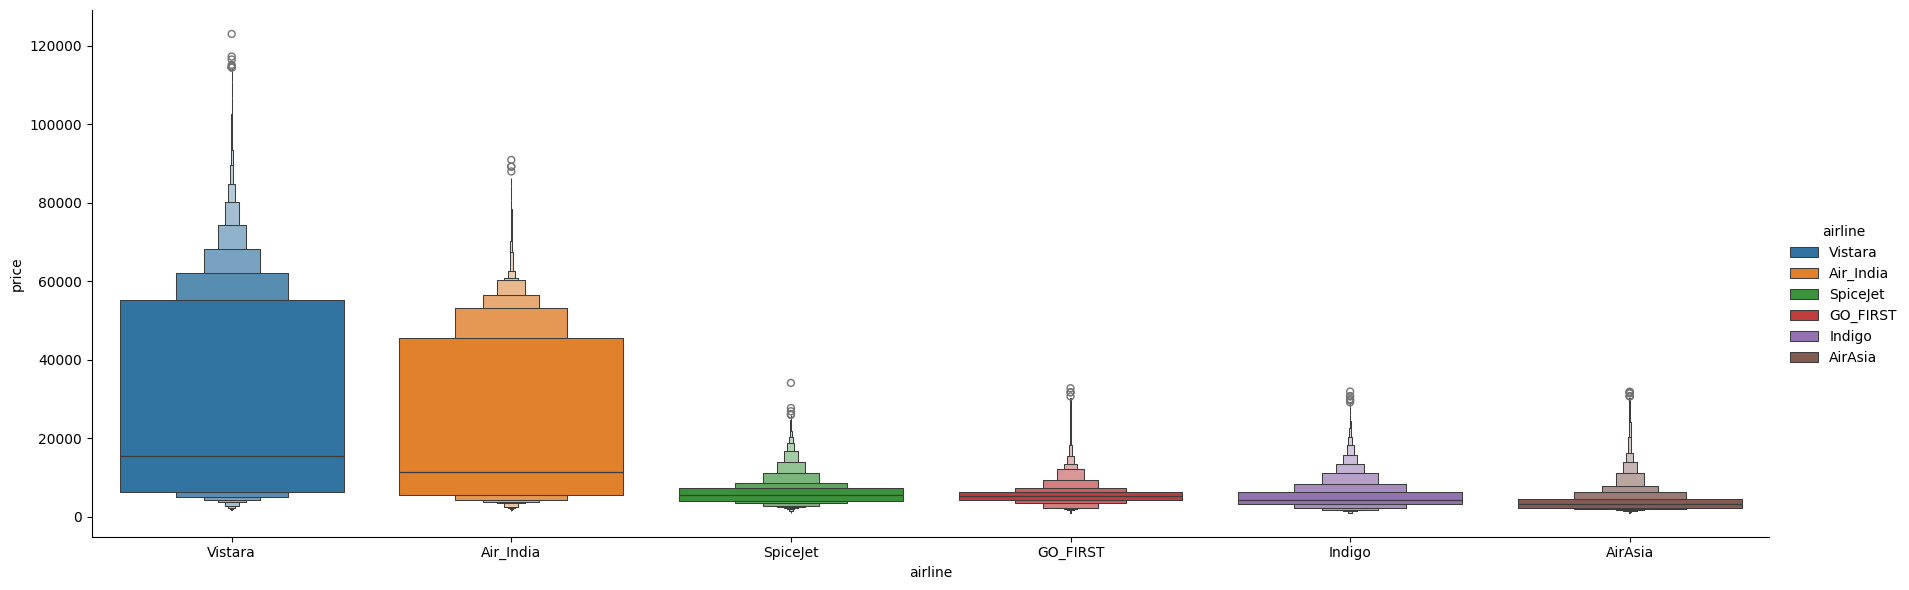

In [12]:
sns.catplot(x='airline',y='price',data=train_data.sort_values('price',ascending=False),kind='boxen',aspect=3,height=6,hue='airline',legend='brief')

In [13]:
airline = train_data[['airline']]
airline = pd.get_dummies(airline,drop_first=False)
airline.head()

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True


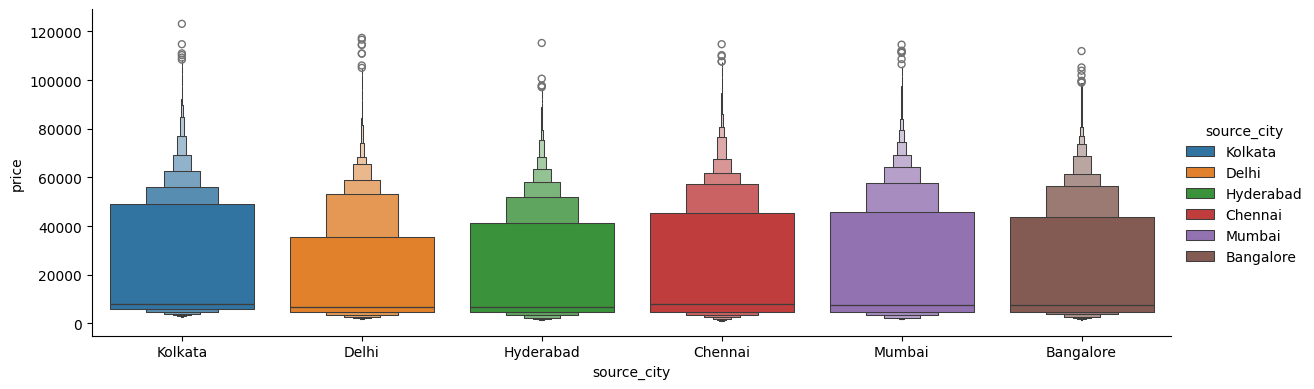

In [14]:
sns.catplot(x='source_city',y='price',data=train_data.sort_values('price',ascending=False),kind='boxen',aspect=3,height=4,hue='source_city',legend='brief')

In [15]:
source = train_data[['source_city']]
source = pd.get_dummies(source,drop_first=False)
source.head()

,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


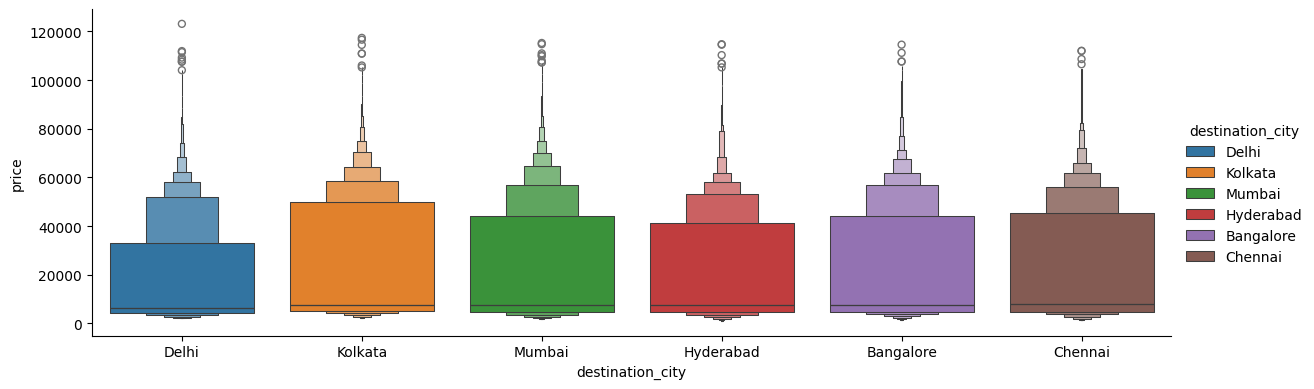

In [16]:
sns.catplot(x='destination_city',y='price',data=train_data.sort_values('price',ascending=False),kind='boxen',aspect=3,height=4,hue='destination_city',legend='brief')

In [17]:
destination = train_data[['destination_city']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


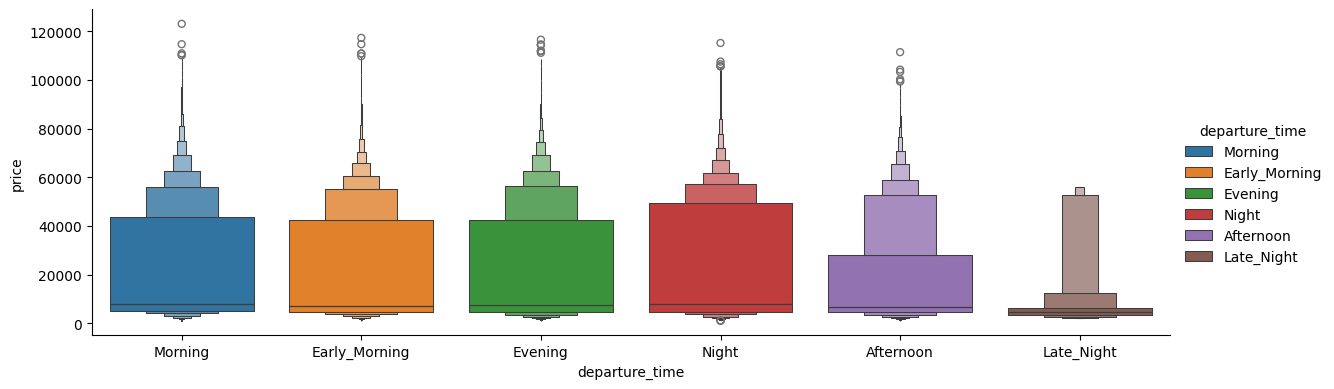

In [18]:
sns.catplot(x='departure_time',y='price',data=train_data.sort_values('price',ascending=False),kind='boxen',aspect=3,height=4,hue='departure_time',legend='brief')

In [19]:
departure = train_data[['departure_time']]
departure = pd.get_dummies(departure,drop_first=True)
departure.head()

,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,False,True,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,False,False,False,True,False
4,False,False,False,True,False


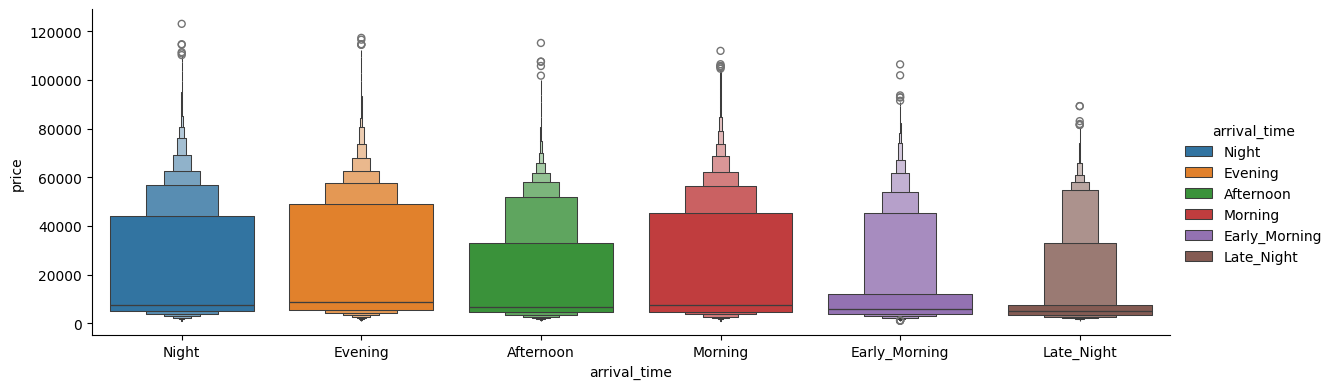

In [20]:
sns.catplot(x='arrival_time',y='price',data=train_data.sort_values('price',ascending=False),kind='boxen',aspect=3,height=4,hue='arrival_time',legend='brief')

In [21]:
arrival = train_data[['arrival_time']]
arrival = pd.get_dummies(arrival,drop_first=True)
arrival.head()

,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,False,False,False,False,True
1,False,False,False,True,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,True,False


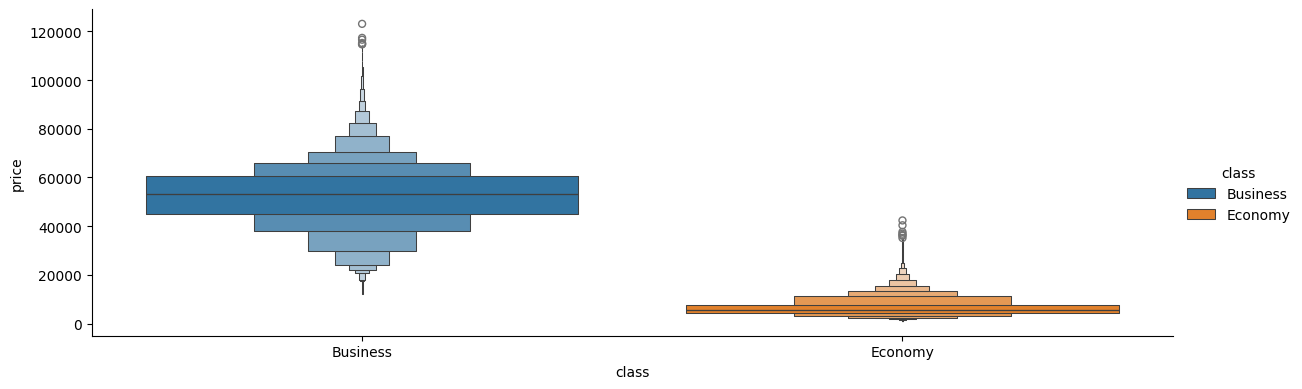

In [22]:
sns.catplot(x='class',y='price',data=train_data.sort_values('price',ascending=False),kind='boxen',aspect=3,height=4,hue='class',legend='brief')

In [23]:
classes = train_data[['class']]
classes = pd.get_dummies(classes,drop_first=True)
classes.head()

,class_Economy
0,True
1,True
2,True
3,True
4,True


In [24]:
print(airline.shape)
print(source.shape)
print(destination.shape)
print(train_data.shape)
print(arrival.shape)
print(classes.shape)
print(departure.shape)

(300153, 6)
(300153, 6)
(300153, 5)
(300153, 12)
(300153, 5)
(300153, 1)
(300153, 5)


In [25]:
data_train = pd.concat(
    [train_data,airline,source,destination,arrival,departure,classes],
    axis = 1)
data_train.drop(
    ['airline','source_city','destination_city',
     'arrival_time','departure_time','class'],
    axis=1,inplace=True)
data_train.head()

,days_left,price,duration_days,duration_hours,duration_mins,no_of_stops,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,class_Economy
0,1,5953,0,2,10,0,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,1,5953,0,2,19,0,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2,1,5956,0,2,10,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,1,5955,0,2,15,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,1,5955,0,2,19,0,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [26]:
X = data_train.drop('price',axis=1)
X.head()

,days_left,duration_days,duration_hours,duration_mins,no_of_stops,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,class_Economy
0,1,0,2,10,0,False,False,False,False,True,...,False,False,False,True,False,True,False,False,False,True
1,1,0,2,19,0,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,True
2,1,0,2,10,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,1,0,2,15,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,1,0,2,19,0,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [27]:
y = data_train['price']
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

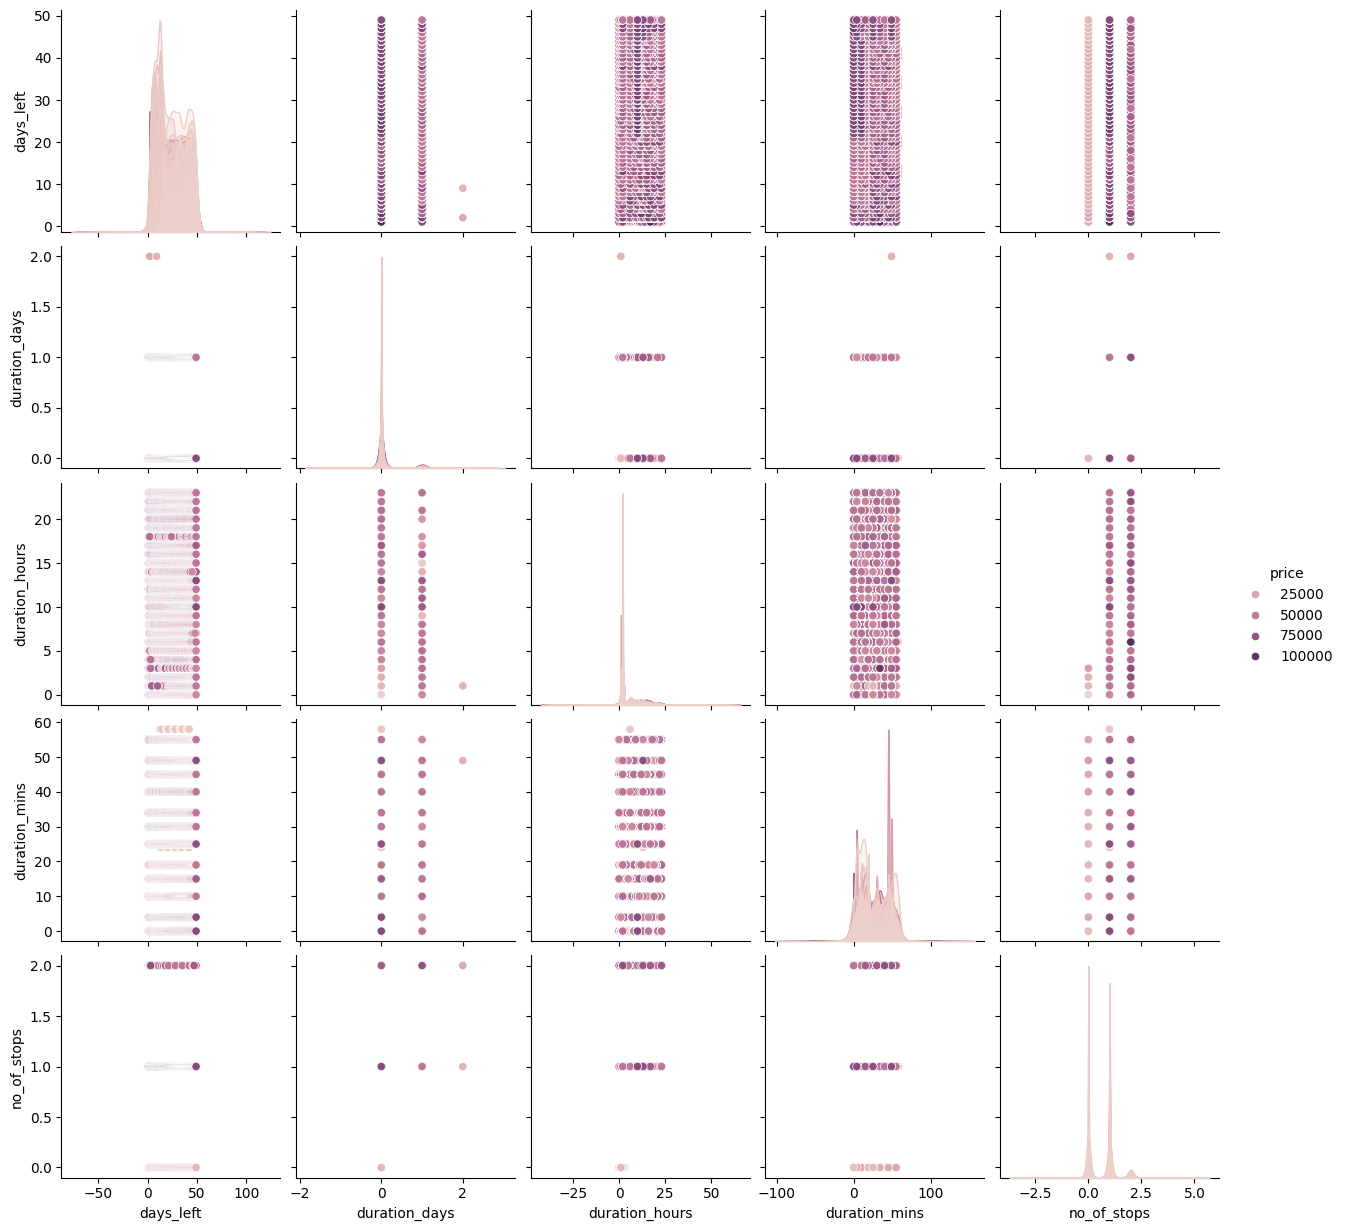

In [28]:
g = sns.pairplot(train_data, hue='price')

In [29]:
reg = ExtraTreesRegressor()
reg.fit(X,y)
print(reg.feature_importances_)

[1.88454574e-02 2.85039838e-03 1.23287518e-02 8.41950283e-03
 3.23547989e-02 3.42077048e-04 4.86114793e-03 6.84633458e-05
 2.71971251e-04 4.77770417e-05 5.84232221e-03 1.00647189e-03
 7.08121582e-04 4.10540528e-03 1.42823899e-03 1.82743201e-03
 2.33039876e-03 1.15905042e-03 3.96518082e-03 1.95325853e-03
 1.99373978e-03 1.92100261e-03 9.71689696e-04 1.62933946e-03
 2.10575774e-04 1.06246726e-03 1.84946805e-03 1.11308851e-03
 1.63538495e-03 5.82410333e-05 1.46951696e-03 1.00050159e-03
 8.80368758e-01]


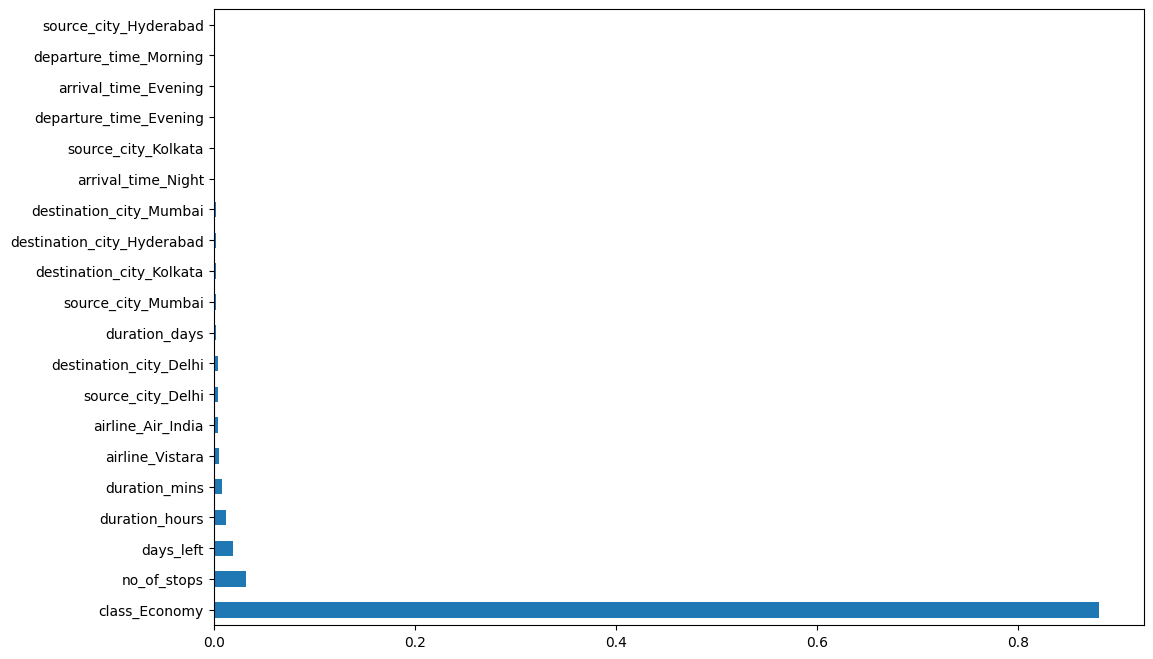

In [30]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=1, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\vaish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vaish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\vaish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [33]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [35]:
prediction = rf_random.predict(X_test)

C:\Users\vaish\AppData\Local\Temp\ipykernel_24676\39448575.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


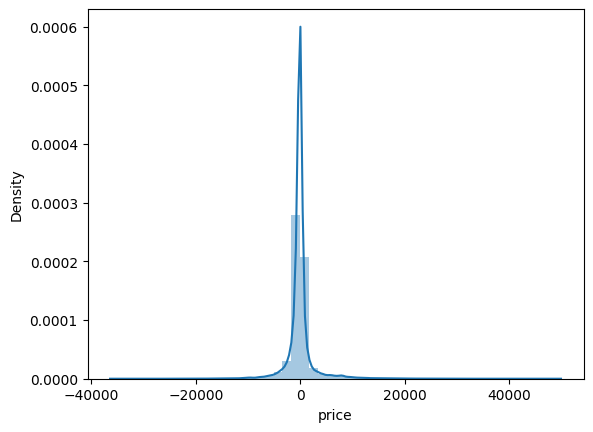

In [36]:
plt.figure(figure = (8.8))
sns.distplot(y_test-prediction)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

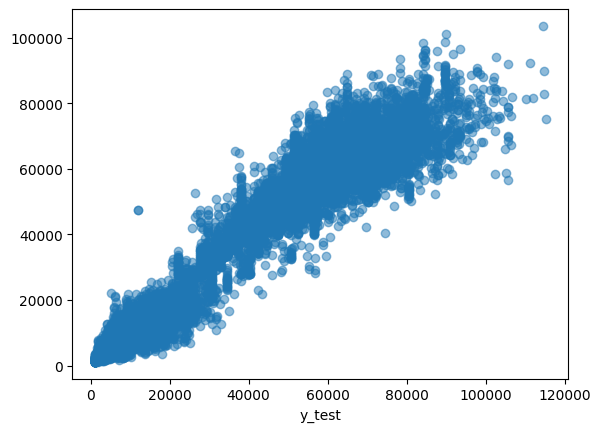

In [37]:
plt.figure(figure = (8.8))
plt.scatter(y_test,prediction, alpha =0.5)
plt.xlabel("y_test")
plt.ylable("y_pred")
plt.show()

In [38]:
print('r2 score: ',metrics.r2_score(y_test,prediction))

r2 score:  0.9844551678361175


In [39]:
file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)

In [44]:
data_train.columns

Index(['days_left', 'price', 'duration_days', 'duration_hours',
       'duration_mins', 'no_of_stops', 'airline_AirAsia', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Bangalore', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'class_Economy'],
      dtype='object')

In [45]:
train_data['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [46]:
train_data['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64